In [40]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
df = pdr.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end = '2020-01-1')

In [42]:
df.to_csv('AAPL.csv')

In [43]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064


In [44]:
df.shape

(2012, 6)

In [45]:
df1 = df['Close']

In [46]:
df1.shape

(2012,)

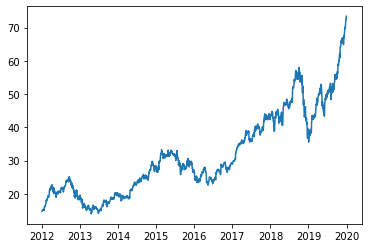

In [47]:
plt.plot(df1)

LSTM are sensitive to *scale* of the data so we use Min Max Scaler

### Data Preprocessing

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [49]:
df1.shape

(2012, 1)

In [50]:
train_data_size = int(len(df1)*0.65)
test_size = len(df1)-train_data_size

In [51]:
train_data_size, test_size

(1307, 705)

In [52]:
train_data, test_data = df1[0:train_data_size, :], df1[train_data_size:len(df1),:1]

In [53]:
## Creation of dataset as matrix for learning and testing

def create_dataset(dataset, time_step=1):
    data_X = []
    data_Y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i: (i+time_step), 0]
        data_X.append(a)
        data_Y.append(dataset[i+time_step,0])
    return np.array(data_X), np.array(data_Y)

In [54]:
## Rehape X and Y for train and test
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [55]:
X_train

array([[0.01243228, 0.0137596 , 0.01651631, ..., 0.09996278, 0.10812481,
        0.10497773],
       [0.0137596 , 0.01651631, 0.01914091, ..., 0.10812481, 0.10497773,
        0.10315791],
       [0.01651631, 0.01914091, 0.01873851, ..., 0.10497773, 0.10315791,
        0.10915183],
       ...,
       [0.25725218, 0.25998486, 0.25964855, ..., 0.35125703, 0.35201381,
        0.34982764],
       [0.25998486, 0.25964855, 0.25931221, ..., 0.35201381, 0.34982764,
        0.34848228],
       [0.25964855, 0.25931221, 0.25784076, ..., 0.34982764, 0.34848228,
        0.35041622]])

In [56]:
y_train

array([0.10315791, 0.10915183, 0.11329593, ..., 0.34848228, 0.35041622,
       0.35066845])

In [57]:
X_train.shape

(1206, 100)

In [58]:
X_test.shape, y_test.shape

((604, 100), (604,))

####  For LSTM model should be in a 3-dimensions so X_train, X_test needs to be reshaped

In [59]:
# REshape as [sample_size, time_step, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [60]:
X_train.shape, X_test.shape

((1206, 100, 1), (604, 100, 1))

###  Creation of Stacked LSTM

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
## Input_shape = [time_steps, features]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=64, verbose=1)

Train on 1206 samples, validate on 604 samples
Epoch 1/100
1206/1206 [==============================] - 9s 8ms/sample - loss: 0.0094 - val_loss: 0.0749
Epoch 2/100
1206/1206 [==============================] - 6s 5ms/sample - loss: 0.0017 - val_loss: 0.0056
Epoch 3/100
1206/1206 [==============================] - 6s 5ms/sample - loss: 4.5417e-04 - val_loss: 0.0042
Epoch 4/100
1206/1206 [==============================] - 6s 5ms/sample - loss: 3.0301e-04 - val_loss: 0.0013
Epoch 5/100
1206/1206 [==============================] - 6s 5ms/sample - loss: 2.8630e-04 - val_loss: 0.0014
Epoch 6/100
1206/1206 [==============================] - 5s 5ms/sample - loss: 2.7633e-04 - val_loss: 0.0014
Epoch 7/100
1206/1206 [==============================] - 5s 5ms/sample - loss: 2.7009e-04 - val_loss: 0.0012
Epoch 8/100
1206/1206 [==============================] - 6s 5ms/sample - loss: 2.6146e-04 - val_loss: 0.0011
Epoch 9/100
1206/1206 [==============================] - 6s 5ms/sample - loss: 2.6331e-04

1206/1206 [==============================] - 6s 5ms/sample - loss: 1.0783e-04 - val_loss: 4.4114e-04
Epoch 75/100
1206/1206 [==============================] - 5s 4ms/sample - loss: 1.0903e-04 - val_loss: 5.6938e-04
Epoch 76/100
1206/1206 [==============================] - 5s 4ms/sample - loss: 9.3107e-05 - val_loss: 0.0010
Epoch 77/100
1206/1206 [==============================] - 5s 4ms/sample - loss: 9.4246e-05 - val_loss: 8.5660e-04
Epoch 78/100
1206/1206 [==============================] - 5s 5ms/sample - loss: 1.0193e-04 - val_loss: 5.2187e-04
Epoch 79/100
1206/1206 [==============================] - 5s 4ms/sample - loss: 9.8687e-05 - val_loss: 6.5947e-04
Epoch 80/100
1206/1206 [==============================] - 5s 4ms/sample - loss: 9.5303e-05 - val_loss: 8.3655e-04
Epoch 81/100
1206/1206 [==============================] - 6s 5ms/sample - loss: 9.3571e-05 - val_loss: 7.2315e-04
Epoch 82/100
1206/1206 [==============================] - 5s 4ms/sample - loss: 9.3299e-05 - val_loss: 6.

In [65]:
import tensorflow as tf

In [66]:
tf.__version__

'1.14.0'

In [67]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [68]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [69]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.336201970366158

In [70]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

46.61107563149401

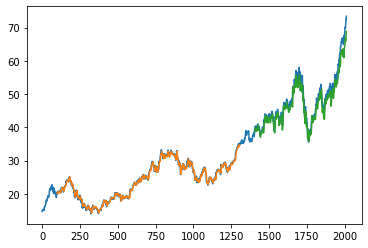

In [71]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
len(test_data)

705

In [74]:
## to predict a value we need t have previous 100 value
x_input = test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [75]:
test_input = list(x_input)

In [76]:
test_input

[array([0.61044316, 0.608299  , 0.64399228, 0.61784244, 0.61359627,
        0.63360802, 0.64979404, 0.64983606, 0.65942152, 0.6586648 ,
        0.61737998, 0.633566  , 0.62377031, 0.62952999, 0.64416042,
        0.64302535, 0.63024468, 0.6449172 , 0.66211218, 0.66202808,
        0.66585387, 0.67649038, 0.70545699, 0.70335492, 0.6851089 ,
        0.68994366, 0.69330699, 0.70200962, 0.69440011, 0.68082065,
        0.68498278, 0.68061043, 0.69469437, 0.68990164, 0.68540323,
        0.70705459, 0.70966115, 0.6859918 , 0.69381153, 0.71983519,
        0.72004541, 0.70886235, 0.71991929, 0.73278399, 0.75851346,
        0.757084  , 0.75477176, 0.75077777, 0.75460356, 0.75935428,
        0.77659127, 0.77427903, 0.78781635, 0.78949805, 0.80211051,
        0.81249478, 0.78827881, 0.78815269, 0.81127554, 0.84095692,
        0.84801986, 0.84646435, 0.84692674, 0.85613385, 0.85911889,
        0.86777944, 0.86677035, 0.87732282, 0.86962928, 0.88274622,
        0.88837977, 0.88497441, 0.87194151, 0.86

In [77]:
temp_input = test_input[0].tolist()

In [78]:
temp_input

[0.6104431550591249,
 0.6082989955506957,
 0.6439922846438464,
 0.617842442702158,
 0.613596270430065,
 0.6336080195568594,
 0.6497940374544713,
 0.6498360558986438,
 0.6594215214942785,
 0.6586648045973951,
 0.6173799832150748,
 0.6335660011126869,
 0.6237703149955969,
 0.6295299852117529,
 0.6441604225708326,
 0.6430253472255076,
 0.6302446836644637,
 0.6449172036180124,
 0.6621121773781355,
 0.6620280763394941,
 0.6658538717189728,
 0.6764903757715877,
 0.705456993079947,
 0.7033549161659869,
 0.6851089039488838,
 0.6899436551908735,
 0.6933069910832692,
 0.7020096202992065,
 0.6944001121347181,
 0.6808206490823219,
 0.6849827844660699,
 0.6806104285608667,
 0.6946943695445185,
 0.689901636746701,
 0.6854032255089804,
 0.7070545920626516,
 0.7096611469078675,
 0.6859918044788773,
 0.6938115331648211,
 0.7198351914733991,
 0.7200454119948545,
 0.7088623474165152,
 0.7199192925120406,
 0.7327839929614295,
 0.7585134580105035,
 0.7570839969547853,
 0.7547717636696663,
 0.75077776621290

###  Predicting values for next 30 days

In [79]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9328276]
101
1 day input [0.608299   0.64399228 0.61784244 0.61359627 0.63360802 0.64979404
 0.64983606 0.65942152 0.6586648  0.61737998 0.633566   0.62377031
 0.62952999 0.64416042 0.64302535 0.63024468 0.6449172  0.66211218
 0.66202808 0.66585387 0.67649038 0.70545699 0.70335492 0.6851089
 0.68994366 0.69330699 0.70200962 0.69440011 0.68082065 0.68498278
 0.68061043 0.69469437 0.68990164 0.68540323 0.70705459 0.70966115
 0.6859918  0.69381153 0.71983519 0.72004541 0.70886235 0.71991929
 0.73278399 0.75851346 0.757084   0.75477176 0.75077777 0.75460356
 0.75935428 0.77659127 0.77427903 0.78781635 0.78949805 0.80211051
 0.81249478 0.78827881 0.78815269 0.81127554 0.84095692 0.84801986
 0.84646435 0.84692674 0.85613385 0.85911889 0.86777944 0.86677035
 0.87732282 0.86962928 0.88274622 0.88837977 0.88497441 0.87194151
 0.86698064 0.86601364 0.88531069 0.87656611 0.8914908  0.88901036
 0.87601954 0.85621802 0.86584544 0.88198937 0.9035567  0.88762305
 0.89418152 0.90380894 0.90670982 0

10 day output [[0.14940177]]
11 day input [0.633566   0.62377031 0.62952999 0.64416042 0.64302535 0.63024468
 0.6449172  0.66211218 0.66202808 0.66585387 0.67649038 0.70545699
 0.70335492 0.6851089  0.68994366 0.69330699 0.70200962 0.69440011
 0.68082065 0.68498278 0.68061043 0.69469437 0.68990164 0.68540323
 0.70705459 0.70966115 0.6859918  0.69381153 0.71983519 0.72004541
 0.70886235 0.71991929 0.73278399 0.75851346 0.757084   0.75477176
 0.75077777 0.75460356 0.75935428 0.77659127 0.77427903 0.78781635
 0.78949805 0.80211051 0.81249478 0.78827881 0.78815269 0.81127554
 0.84095692 0.84801986 0.84646435 0.84692674 0.85613385 0.85911889
 0.86777944 0.86677035 0.87732282 0.86962928 0.88274622 0.88837977
 0.88497441 0.87194151 0.86698064 0.86601364 0.88531069 0.87656611
 0.8914908  0.88901036 0.87601954 0.85621802 0.86584544 0.88198937
 0.9035567  0.88762305 0.89418152 0.90380894 0.90670982 0.92222315
 0.94202468 0.94433704 0.9415202  0.94269736 0.94025901 0.95942994
 0.96056502 0.984276

20 day output [[0.0972124]]
21 day input [0.67649038 0.70545699 0.70335492 0.6851089  0.68994366 0.69330699
 0.70200962 0.69440011 0.68082065 0.68498278 0.68061043 0.69469437
 0.68990164 0.68540323 0.70705459 0.70966115 0.6859918  0.69381153
 0.71983519 0.72004541 0.70886235 0.71991929 0.73278399 0.75851346
 0.757084   0.75477176 0.75077777 0.75460356 0.75935428 0.77659127
 0.77427903 0.78781635 0.78949805 0.80211051 0.81249478 0.78827881
 0.78815269 0.81127554 0.84095692 0.84801986 0.84646435 0.84692674
 0.85613385 0.85911889 0.86777944 0.86677035 0.87732282 0.86962928
 0.88274622 0.88837977 0.88497441 0.87194151 0.86698064 0.86601364
 0.88531069 0.87656611 0.8914908  0.88901036 0.87601954 0.85621802
 0.86584544 0.88198937 0.9035567  0.88762305 0.89418152 0.90380894
 0.90670982 0.92222315 0.94202468 0.94433704 0.9415202  0.94269736
 0.94025901 0.95942994 0.96056502 0.98427651 0.98381398 0.99104513
 1.         0.93282759 0.88658679 0.81225866 0.71986794 0.61536449
 0.50645542 0.4029237

In [80]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [81]:
import matplotlib.pyplot as plt

In [82]:
len(df1)

2012

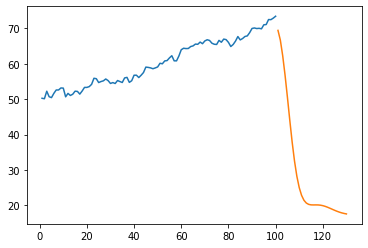

In [83]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

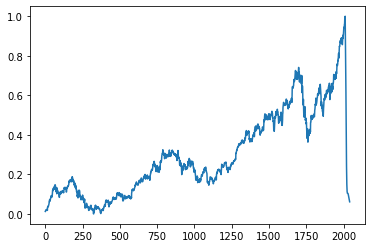

In [89]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [90]:
df3=scaler.inverse_transform(df3).tolist()

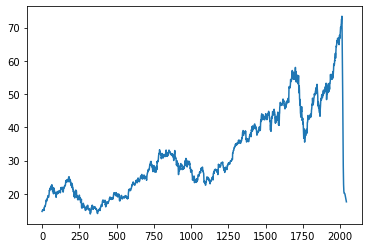

In [91]:
plt.plot(df3)